In [14]:
import sonecules

In [15]:
sonecules.startup()

<IPython.core.display.Javascript object>

SC already started
sclang already started
scsynth already started


# Sonecule - Event-based Sonification

is a sonecule that allows to specify a
condition function and a sound to be played when the con-
dition is met. Examples for these sounds are Auditory
Icons and Earcons which might be selected or parameter-
ized based on the condition result on the input data

## Data Preparation

In [16]:
%run prepare-data.ipynb

## Implementation

In [17]:
from pya import Asig
from mesonic.synth import Synth

from sonecules.base import Sonecule

from sonecules.buffersyn import Audification



In [18]:
help(Audification)

Help on class Audification in module sonecules.buffersyn:

class Audification(BufferSynth)
 |  Audification(data, sr, context=None)
 |  
 |  Method resolution order:
 |      Audification
 |      BufferSynth
 |      sonecules.base.Sonecule
 |      builtins.object
 |  
 |  Data and other attributes defined here:
 |  
 |  __annotations__ = {}
 |  
 |  synth_name = 'playbuf'
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from BufferSynth:
 |  
 |  __init__(self, data, sr, context=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  resample(self, **kwargs)
 |      resample to given sampling rate (sr) applying specific resampling rate (rate)
 |      self.data is assumed to be synchronized with buffer self.buf
 |  
 |  schedule(self, at=0, params=None)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from sonecules.base.Sonecule:
 |  
 |  reset(self)
 |

In [23]:
class ConditionalSound(Sonecule):
    
    def __init__(self, sound_file, context=None):
        super().__init__(context=context)
        self.asig = Asig(sound_file)
        self.audification = Audification(self.asig.sig, self.asig.sr)
        
    def evaluate(self, df, onset, condition):
        for index, row in df.iterrows():
            #time = onset[0]
            #self.context.at()

            print(index)
            print("")
            print(row)
            
            break

In [35]:
for index, row in penguins_df.iterrows():
    #time = onset[0]
    #self.context.at()

    print(index)
    print("")
    print(row)

    break

0

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       Male
Name: 0, dtype: object


In [38]:
row

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       Male
Name: 0, dtype: object

In [37]:
row["species"]

'Adelie'

## Usage / Demo Snippets

Asig('files/ring.wav'): 2 x 44160 @ 44100Hz = 1.001s cn=['0', '1']

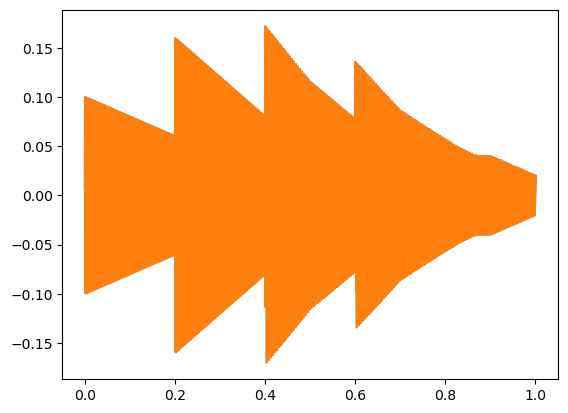

In [24]:
asig = Asig("files/ring.wav")
asig.plot()

In [25]:
cs = ConditionalSound("files/ring.wav")

In [29]:
onset_col = penguins_df.columns[0]


In [30]:
from sc3nb import linlin

In [31]:
linlin?

In [33]:
cs.evaluate(penguins_df, (onset_col, lambda val: linlin(val, 0,1, 0,10)), lambda row: print(row))

0

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       Male
Name: 0, dtype: object
